#1. Plot the training data

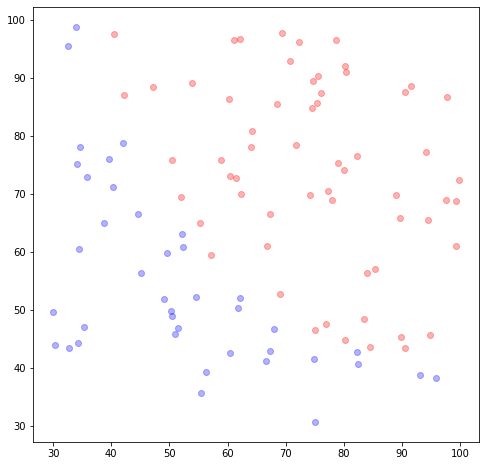

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment05/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


#2. Plot the estimated parameters
## - Logistic regression
$\sigma(z)$ = ${1 \over 1 + exp(-z)}$
##Gradient Descent
J($\theta_0$, $\theta_1$, $\theta_2$) = ${1 \over m}$$\sum_{i=1}^m$($-l^{(i)}$log($\sigma(z^{(i)})$)) - (1 - $l^{(i)}$)log(1 - $\sigma(z^{(i)})$) \\
$\theta_0^{(t+1)}$ := $\theta_0^{(t)}$ - $\alpha$${1 \over m}$$\sum_{i = 1}^m$($\sigma(z^{(i)})$ - $l^{(i)}$) \\
$\theta_1^{(t+1)}$ := $\theta_1^{(t)}$ - $\alpha$${1 \over m}$$\sum_{i = 1}^m$($\sigma(z^{(i)})$ - $l^{(i)}$) x$^{(i)}$ \\
$\theta_2^{(t+1)}$ := $\theta_2^{(t)}$ - $\alpha$${1 \over m}$$\sum_{i = 1}^m$($\sigma(z^{(i)})$ - $l^{(i)}$) y$^{(i)}$ 


iter : 10824492
converge


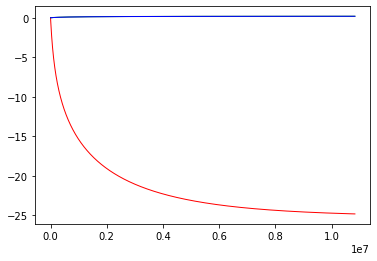

In [0]:
#x, y, label
#세타0, 세타1, 세타2
t0 = 0.0
t1 = 0.0
t2 = 0.0
#sigma(z)
sigz = 0
#Training error
J = 0

#theta list
t0_list = []
t1_list = []
t2_list = []

#error list
E = []

#learning rate alpha(a)
#0.1부터 0.001까지 /3 단위로 해봤으나 0.1, 0.03등 너무 큰 값에선 runtime warning : division zero, invalid value 등이 뜨며
#0.003에선 converge하기 위한 threshold값에 너무 빨리 도달하지만 실제로는 지그재그 형태인 것으로 추정된다
#0.001에선 아무 이상없이 threshold에 도달하였을 때 converge에 도달. 따라서 0.001이 최선의 learning rate로 보인다
a = 0.001

iter = 0
#변화가 상당히 줄어들었을 때(굉장히 작은 값의 변화) = converge
threshold = 0.0000001

while 1:
  #z = theta^T * X
  z = t0 + t1 * x + t2 * y
  #sigma(z)
  sigz = 1 / (1 + np.exp(-z))
  #error
  J = np.mean( -1 * label * np.log(sigz) - (1 - label) * np.log(1 - sigz) )
  #Threshold check을 위한 임시 값
  tmp0 = t0
  tmp1 = t1
  tmp2 = t2
  #Gradient Descent
  t0 = t0 - a * np.mean(sigz - label)
  t1 = t1 - a * np.mean((sigz - label) * x)
  t2 = t2 - a * np.mean((sigz - label) * y)
  #add to list
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  E.append(J)
  #Threshold check
  if abs(tmp0 - t0) < threshold and abs(tmp1 - t1) < threshold and abs(tmp2 - t2) < threshold:
    print("iter : %d" %iter)
    print("converge")
    break

  iter += 1

t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
plt.setp(t0_line, color = 'r', linewidth = 1)
plt.setp(t1_line, color = 'g', linewidth = 1)
plt.setp(t2_line, color = 'b', linewidth = 1)

plt.show()

#3. Plot the training error

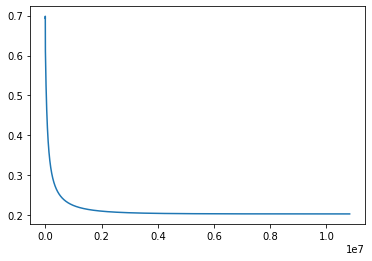

In [0]:
plt.plot(E)
plt.show()

#4. Plot the obtained classifier
30~100 범위에 0.1단위로 점들이 찍혀있을 경우 color맵과 $\sigma(\theta^TX)$값을 이용하여 colormap을 표현한다.

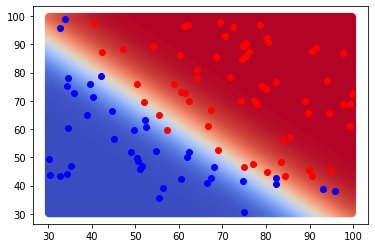

In [0]:
import math
#범위 : 30부터 100까지
X = np.arange(30, 100, 0.1)
Y = np.arange(30, 100, 0.1)
#이차원 배열 L(label의 리스트) = sigma(Theta ^ T * X)
L = []
L2 = []

x_range = 0
y_range = 0

#Theta ^ T * X
ttx = 0
#sigma(Theta ^ T * X)
sigttx = 0

while x_range < len(X):
  while y_range < len(Y):

    ttx = t0 + t1 * X[x_range] + t1 * Y[y_range] 
    sigttx = 1 / (1 + math.exp(-ttx))
    L2.append(sigttx)

    y_range += 1
  #L에 L2리스트를 넣어서 2차원 배열 생성
  L.append(L2)

  x_range += 1
  y_range = 0
  L2 = []

#X, Y를 이차원 배열로 만듦
X, Y = np.meshgrid(X, Y)


#Colormap으로 표현
plt.scatter(X, Y, c=L, cmap=plt.cm.coolwarm, alpha = 0.1, vmin = 0, vmax = 1)
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.show()

#PS. $\theta_1$, $\theta_2$의 변화가 너무 작아서 따로 그린 그래프

0.20358741746115527 0.19879653659263


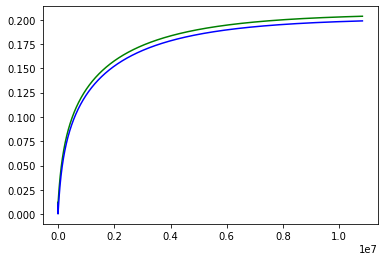

In [0]:
print(t1, t2)
plt.plot(t1_list, color = 'g')
plt.plot(t2_list, color = 'b')
plt.show()